In [106]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [107]:
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [108]:
df_primary_energy = pd.read_csv("/content/primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878


## Część 1




Filtrowanie danych dla Polski

In [109]:
import pandas as pd

df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_primary_energy = pd.read_csv("/content/primary-energy-cons.csv")

df_co2_poland = df_co2[df_co2['Entity'] == 'Poland']
df_primary_energy_poland = df_primary_energy[df_primary_energy['Entity'] == 'Poland']

Łączenie ramki danych na podstawie kolumny year

In [110]:
df_merged_poland = pd.merge(df_co2_poland, df_primary_energy_poland, on='Year', how='inner')
display(df_merged_poland.head())

,Entity_x,Year,Annual CO₂ emissions (per capita),Entity_y,Code,Primary energy consumption (TWh)
0,Poland,1965,7.893703,Poland,POL,776.05330
1,Poland,1966,7.996349,Poland,POL,791.17820
2,Poland,1967,8.138128,Poland,POL,814.29987
3,Poland,1968,8.597721,Poland,POL,876.36676
4,Poland,1969,9.076116,Poland,POL,936.06604


Zapis do pliku CSV


In [111]:
df_merged_poland.to_csv('poland_energy_co2.csv', index=False)

# Część 2

In [112]:
countries = ['European Union (27)', 'United States', 'China', 'India']

df_co2_filtered = df_co2[df_co2['Entity'].isin(countries)]
df_primary_energy_filtered = df_primary_energy[df_primary_energy['Entity'].isin(countries)]

display(df_co2_filtered.head())
display(df_primary_energy_filtered.head())

,Entity,Year,Annual CO₂ emissions (per capita)
4853,China,1907,0.048403
4854,China,1908,0.055021
4855,China,1909,0.058310
4856,China,1910,0.059680
4857,China,1911,0.058271


,Entity,Code,Year,Primary energy consumption (TWh)
2418,China,CHN,1965,1536.1942
2419,China,CHN,1966,1669.3080
2420,China,CHN,1967,1501.0684
2421,China,CHN,1968,1516.6958
2422,China,CHN,1969,1845.1862


In [113]:
merged_dfs = {}
for country in countries:
    df_co2_country = df_co2_filtered[df_co2_filtered['Entity'] == country]
    df_primary_energy_country = df_primary_energy_filtered[df_primary_energy_filtered['Entity'] == country]

    merged_df_country = pd.merge(df_co2_country, df_primary_energy_country, on='Year', how='inner')
    merged_dfs[country] = merged_df_country

for country, df in merged_dfs.items():
    print(f"Połączone dane dla {country}:")
    display(df.head())

Połączone dane dla European Union (27):


,Entity_x,Year,Annual CO₂ emissions (per capita),Entity_y,Code,Primary energy consumption (TWh)
0,European Union (27),1965,7.218554,European Union (27),NaN,9454.095
1,European Union (27),1966,7.380306,European Union (27),NaN,9775.155
2,European Union (27),1967,7.491090,European Union (27),NaN,10113.583
3,European Union (27),1968,7.895214,European Union (27),NaN,10829.146
4,European Union (27),1969,8.356936,European Union (27),NaN,11723.261


Połączone dane dla United States:


,Entity_x,Year,Annual CO₂ emissions (per capita),Entity_y,Code,Primary energy consumption (TWh)
0,United States,1965,17.375320,United States,USA,14439.700
1,United States,1966,18.013336,United States,USA,15247.364
2,United States,1967,18.462694,United States,USA,15778.539
3,United States,1968,18.919760,United States,USA,16719.387
4,United States,1969,19.654870,United States,USA,17583.424


Połączone dane dla China:


,Entity_x,Year,Annual CO₂ emissions (per capita),Entity_y,Code,Primary energy consumption (TWh)
0,China,1965,0.691561,China,CHN,1536.1942
1,China,1966,0.740110,China,CHN,1669.3080
2,China,1967,0.604744,China,CHN,1501.0684
3,China,1968,0.634442,China,CHN,1516.6958
4,China,1969,0.757577,China,CHN,1845.1862


Połączone dane dla India:


,Entity_x,Year,Annual CO₂ emissions (per capita),Entity_y,Code,Primary energy consumption (TWh)
0,India,1965,0.313588,India,IND,619.45150
1,India,1966,0.318276,India,IND,638.41380
2,India,1967,0.311872,India,IND,658.43353
3,India,1968,0.333009,India,IND,703.98520
4,India,1969,0.332309,India,IND,780.43600


In [114]:
output_excel_file = 'energy_co2_by_country.xlsx'
with pd.ExcelWriter(output_excel_file) as writer:
    for country, df in merged_dfs.items():
        df.to_excel(writer, sheet_name=country.replace(' (27)', ''), index=False)

print(f"Plik '{output_excel_file}' został utworzony pomyślnie.")

Plik 'energy_co2_by_country.xlsx' został utworzony pomyślnie.


## Część 3: Baza danych SQLite

In [118]:
countries_db = ['Poland', 'Germany', 'Spain']

df_co2_db = df_co2[df_co2['Entity'].isin(countries_db)]
df_primary_energy_db = df_primary_energy[df_primary_energy['Entity'].isin(countries_db)]

merged_dfs_db = {}
for country in countries_db:
    df_co2_country = df_co2_db[df_co2_db['Entity'] == country]
    df_primary_energy_country = df_primary_energy_db[df_primary_energy_db['Entity'] == country]

    merged_df_country = pd.merge(df_co2_country, df_primary_energy_country, on='Year', how='inner')
    merged_dfs_db[country] = merged_df_country

combined_df_db = pd.concat(merged_dfs_db.values(), ignore_index=True)

conn = sqlite3.connect('energy_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS energy_co2 (
    country TEXT,
    year INTEGER,
    co2_emissions REAL,
    primary_energy_consumption REAL
)
''')

conn.commit()

combined_df_db = combined_df_db.rename(columns={
    'Entity_x': 'country',
    'Year': 'year',
    'Annual CO₂ emissions (per capita)': 'co2_emissions',
    'Primary energy consumption (TWh)': 'primary_energy_consumption'
})

combined_df_db[['country', 'year', 'co2_emissions', 'primary_energy_consumption']].to_sql('energy_co2', conn, if_exists='replace', index=False)

conn.close()

print("Baza danych i tabela 'energy_co2' zostały pomyślnie utworzone i wypełnione danymi.")

Baza danych i tabela 'energy_co2' zostały pomyślnie utworzone i wypełnione danymi.


## Część 4: Analiza i wizualizacja

### Wykresy emisji CO2 i zużycia energii w zależności od roku dla Polski


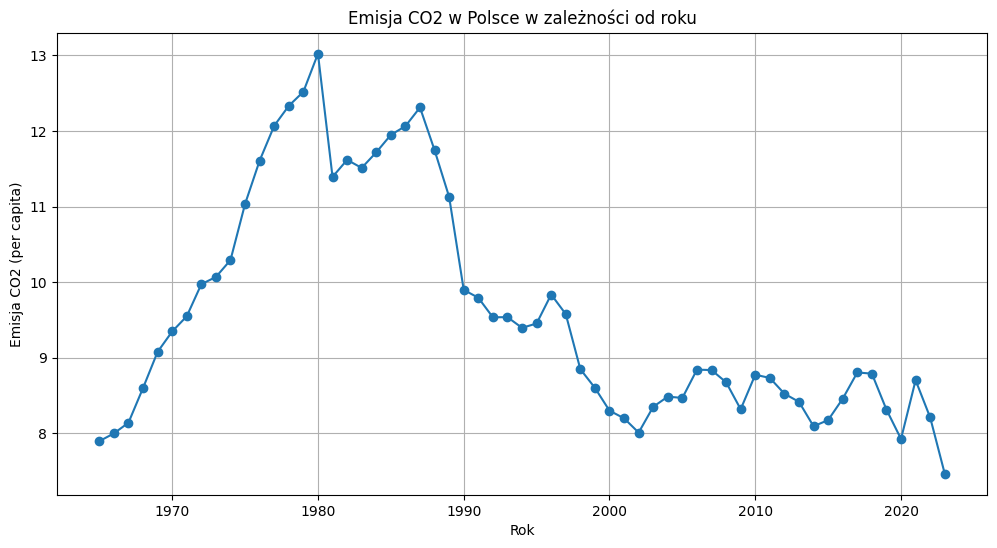

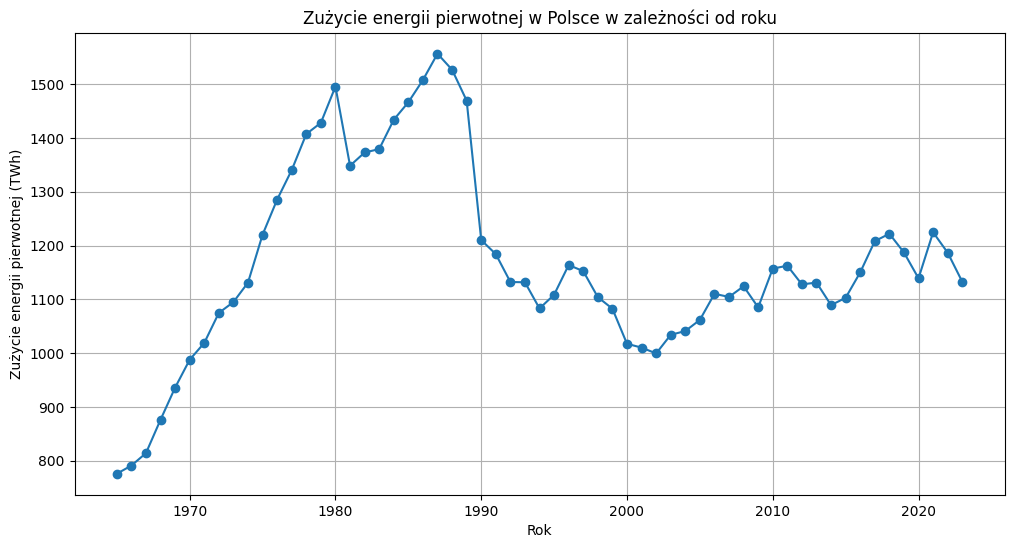

In [119]:
conn = sqlite3.connect('energy_data.db')

df_poland_db = pd.read_sql_query("SELECT year, co2_emissions, primary_energy_consumption FROM energy_co2 WHERE country = 'Poland'", conn)

conn.close()

plt.figure(figsize=(12, 6))
plt.plot(df_poland_db['year'], df_poland_db['co2_emissions'], marker='o', linestyle='-')
plt.title('Emisja CO2 w Polsce w zależności od roku')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2 (per capita)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_poland_db['year'], df_poland_db['primary_energy_consumption'], marker='o', linestyle='-')
plt.title('Zużycie energii pierwotnej w Polsce w zależności od roku')
plt.xlabel('Rok')
plt.ylabel('Zużycie energii pierwotnej (TWh)')
plt.grid(True)
plt.show()

In [120]:
correlation = df_poland_db['co2_emissions'].corr(df_poland_db['primary_energy_consumption'])

print(f"Współczynnik korelacji między emisją CO2 a zużyciem energii pierwotnej w Polsce wynosi: {correlation:.2f}")

Współczynnik korelacji między emisją CO2 a zużyciem energii pierwotnej w Polsce wynosi: 0.82


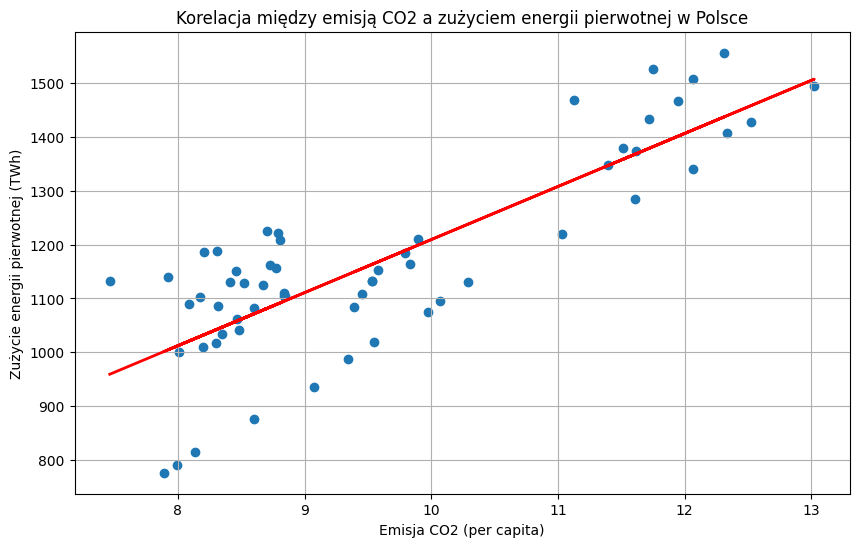

In [122]:
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))
plt.scatter(df_poland_db['co2_emissions'], df_poland_db['primary_energy_consumption'])
plt.title('Korelacja między emisją CO2 a zużyciem energii pierwotnej w Polsce')
plt.xlabel('Emisja CO2 (per capita)')
plt.ylabel('Zużycie energii pierwotnej (TWh)')
plt.grid(True)

# Calculate and plot the regression line
X = df_poland_db['co2_emissions'].values.reshape(-1, 1)
y = df_poland_db['primary_energy_consumption'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.plot(df_poland_db['co2_emissions'], y_pred, color='red', linewidth=2)

plt.show()